Indhentning af datasæt

In [4]:
import pandas as pd

# Indlæser datasæt i CSV format
file_path = 'Emp_attrition_csv.csv'
df = pd.read_csv(file_path, encoding='UTF-8')

# Viser de fem første rækker i datasættet
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


Datarensning

In [13]:
import pandas as pd
df = pd.read_csv('Emp_attrition_csv.csv', encoding='UTF-8')

# Tjek for manglende værdier
print(df.isnull().sum())

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


In [31]:
import pandas as pd
df = pd.read_csv('Emp_attrition_csv.csv', encoding='UTF-8')

# Drop rækker med manglende værdier
data_cleaned = df.dropna()

In [27]:
# Tjekker for dublikerede rækker
print({df.duplicated().sum()})

{112}


In [30]:
# Fjerner dublikerede rækker
data_cleaned = data_cleaned.drop_duplicates()

# Viser antal kolonner & rækker på det oprindelige datasæt
print({df.shape})

# Viser antal kolonner & rækker efter rengøring
print({data_cleaned.shape})

{(74610, 24)}
{(70558, 24)}


Bregning af og oversigt over opsigelsesrate

In [34]:
# Udregner medarberjdertab
attrition_rate = data_cleaned['Attrition'].value_counts(normalize=True)
print("Attrition Distribution:")
print(attrition_rate)

Attrition Distribution:
Stayed    0.52113
Left      0.47887
Name: Attrition, dtype: float64


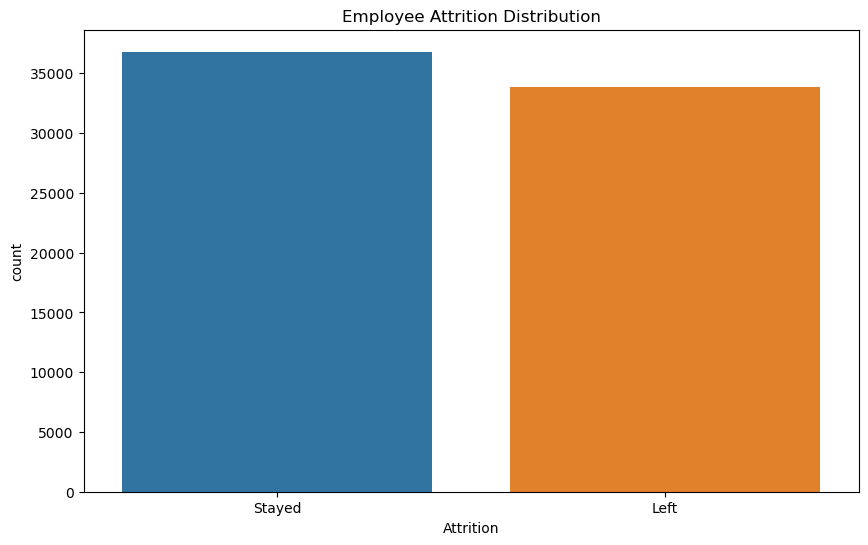

In [35]:
# Importerer biblioteker til visualisering
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiserer medarbejdertab
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Attrition')
plt.title('Employee Attrition Distribution')
plt.show()

Visualisering af nøgleværdier samt relation med opsigelse

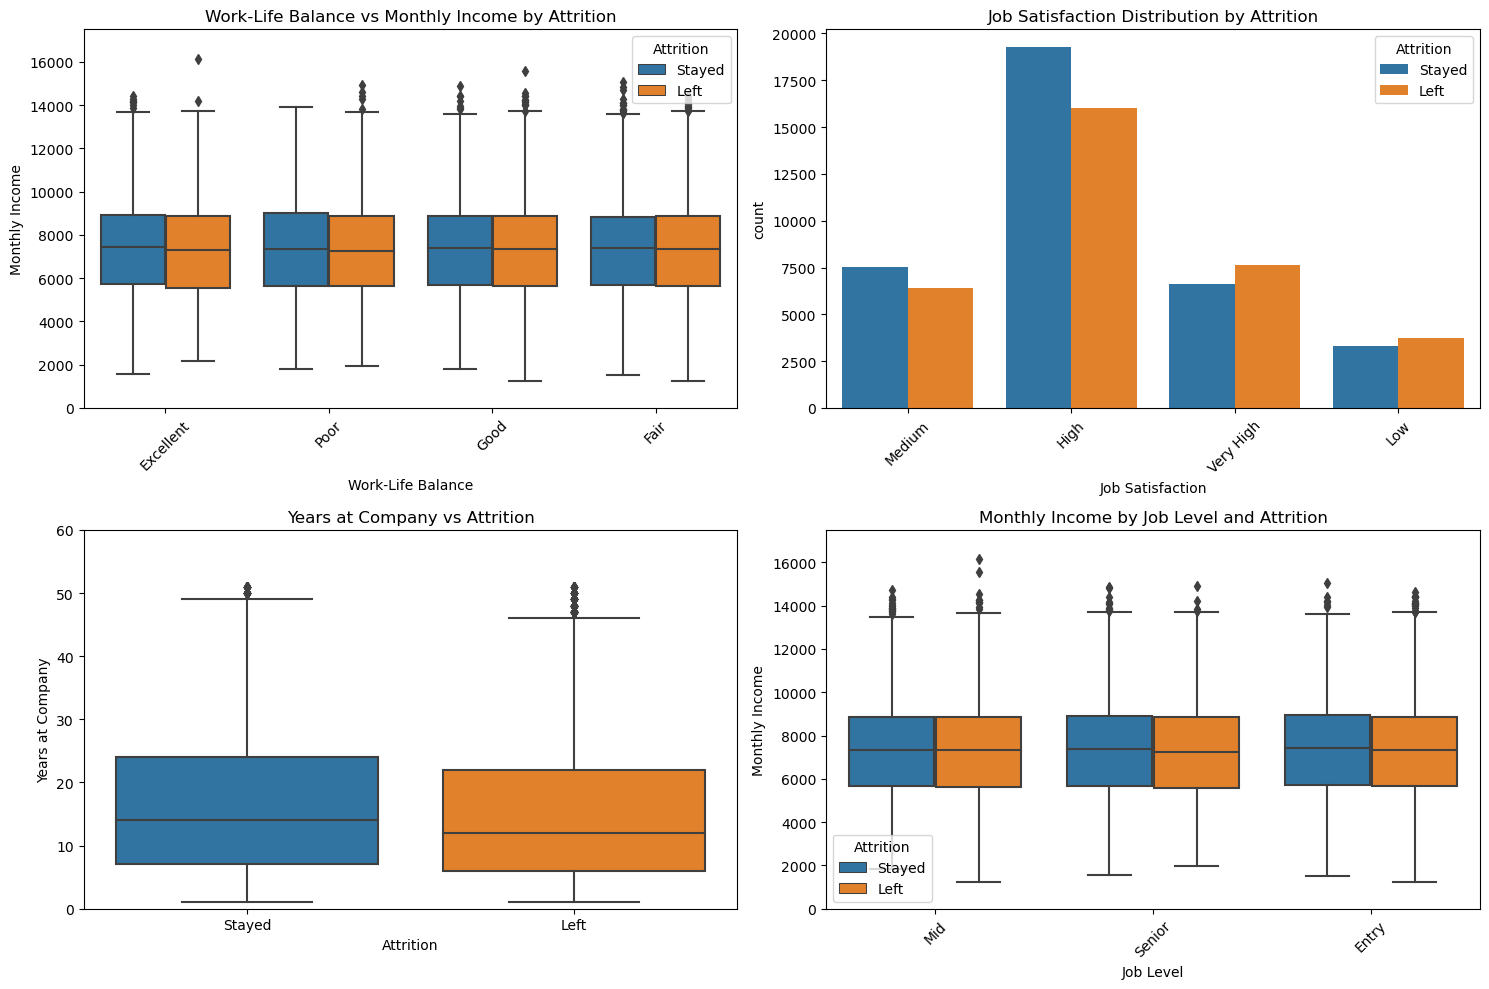

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Laver subplots for key metrics
plt.figure(figsize=(15, 10))

# 1. Work-Life Balance vs Attrition
plt.subplot(2, 2, 1)
sns.boxplot(data=data_cleaned, x='Work-Life Balance', y='Monthly Income', hue='Attrition')
plt.title('Work-Life Balance vs Monthly Income by Attrition')
plt.xticks(rotation=45)
plt.ylim(0, 17500)

# 2. Job Satisfaction vs Attrition
plt.subplot(2, 2, 2)
sns.countplot(data=data_cleaned, x='Job Satisfaction', hue='Attrition')
plt.title('Job Satisfaction Distribution by Attrition')
plt.xticks(rotation=45)

# 3. Years at Company Distribution
plt.subplot(2, 2, 3)
sns.boxplot(data=data_cleaned, x='Attrition', y='Years at Company')
plt.title('Years at Company vs Attrition')
plt.ylim(0, 60)

# 4. Monthly Income Distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=data_cleaned, x='Job Level', y='Monthly Income', hue='Attrition')
plt.title('Monthly Income by Job Level and Attrition')
plt.xticks(rotation=45)
plt.ylim(0, 17500)

plt.tight_layout()
plt.show()